In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.pipeline import make_pipeline


In [2]:
road = 2
direction = "in"
df = pd.read_csv(
    f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv", parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 0 or row == 4 else 0)
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-02-01 00:00:34,2,1,in,1,1,2,0,54,54,61,61,0.04,0.076923,0.6750,1,0
1,2020-02-01 00:00:34,2,2,in,0,0,1,0,0,0,0,0,0.00,0.038462,0.0000,0,1
2,2020-02-01 00:00:34,2,3,in,4,2,0,2,64,87,60,60,0.08,0.000000,0.8000,2,0
3,2020-02-01 00:00:34,2,4,in,2,2,2,0,80,97,30,30,0.08,0.076923,1.0000,2,0
4,2020-02-01 00:00:34,2,5,in,2,2,0,0,50,52,75,90,0.08,0.000000,0.6250,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496944,2020-02-29 23:59:14,2,468,in,1,1,0,0,44,44,120,120,0.04,0.000000,0.5500,4,1
16496945,2020-02-29 23:59:14,2,488,in,0,0,1,0,0,0,0,0,0.00,0.038462,0.0000,0,1
16496946,2020-02-29 23:59:14,2,489,in,1,1,1,0,56,56,59,59,0.04,0.038462,0.7000,1,0
16496947,2020-02-29 23:59:14,2,490,in,2,2,1,0,64,78,54,60,0.08,0.038462,0.8000,2,0


In [3]:
df[df['label']==1].max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          2
km                                 508
direction                           in
all_units                           52
inflow_units                        19
outflow_unit                        21
samecell_units                      52
avg_speed                           46
max_speed                          127
avg_traveltime                     982
max_traveltime                     994
inflow_units_N                    0.76
outflow_units_N               0.807692
avg_speed_N                      0.575
cluster                              4
label                                1
dtype: object

In [4]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

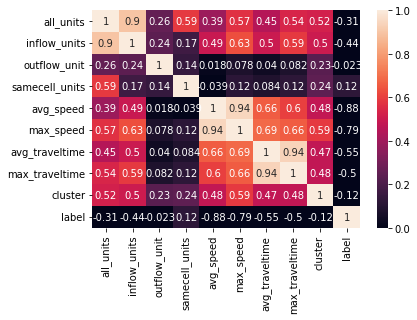

In [5]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [6]:
num_cols = ['all_units', 'inflow_units',
            'avg_speed', 'max_speed',
            'avg_traveltime',"max_traveltime"]
num_cols

['all_units',
 'inflow_units',
 'avg_speed',
 'max_speed',
 'avg_traveltime',
 'max_traveltime']

In [7]:
X=df[num_cols]
y=df['cluster']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = tree.predict(x_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1141630
           1       0.88      0.94      0.91   1732913
           2       0.92      0.96      0.94   1258683
           3       0.70      0.54      0.61    695808
           4       0.98      0.97      0.98    614960

    accuracy                           0.91   5443994
   macro avg       0.90      0.88      0.89   5443994
weighted avg       0.90      0.91      0.90   5443994



In [12]:
print(accuracy_score(y_test, y_pred))

0.909239980793513


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

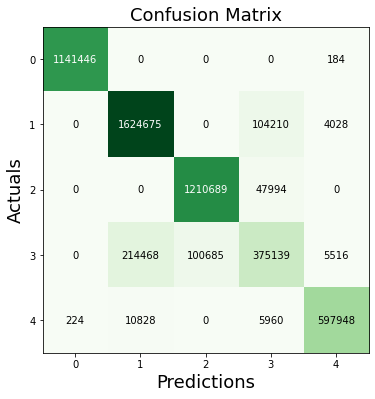

In [14]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
# import joblib
# joblib.dump(tree, f"DecisionTreeModelRoad{road}{direction}.joblib")
